# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


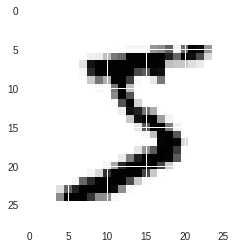

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, ( 3, 3 ), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16,(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense( 256, activation = 'relu' ) )
model.add(Dense( 10, activation = 'softmax' ) )

In [301]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_274 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_275 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_276 (Conv2D)          (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_68 (Flatten)         (None, 144)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 256)               37120     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [304]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1)

Epoch 1/10
 2560/60000 [>.............................] - ETA: 4s - loss: 0.0195 - acc: 0.9941

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 4s 75us/step - loss: 0.0207 - acc: 0.9935
Epoch 2/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0179 - acc: 0.9943
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0186 - acc: 0.9938
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0168 - acc: 0.9948
Epoch 5/10
40192/60000 [===================>..........] - ETA: 1s - loss: 0.0144 - acc: 0.9952

60000/60000 [==============================] - 4s 75us/step - loss: 0.0148 - acc: 0.9949
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0133 - acc: 0.9959
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0119 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0114 - acc: 0.9964
Epoch 9/10
47104/60000 [======================>.......] - ETA: 0s - loss: 0.0094 - acc: 0.9969

60000/60000 [==============================] - 4s 72us/step - loss: 0.0107 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0092 - acc: 0.9971


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [306]:
print(score)

[0.03332020505555265, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [308]:
print(y_pred[:9])
print(y_test[:9])

[[2.05455697e-09 1.56708126e-07 1.69940245e-06 3.14806221e-06
  1.68654410e-10 3.75913536e-11 8.10856157e-12 9.99992967e-01
  2.02638102e-08 2.05240781e-06]
 [4.28211550e-10 2.14305373e-07 9.99999762e-01 2.23521237e-15
  5.50429710e-13 3.14393205e-13 2.75919576e-09 6.41052641e-13
  2.36580009e-11 2.57872590e-16]
 [8.87779805e-09 9.99998808e-01 2.31457964e-08 3.31303110e-11
  7.09057815e-07 1.37512535e-08 7.05228320e-10 5.13288910e-07
  8.69380656e-09 4.65294514e-09]
 [9.99983311e-01 1.66004398e-11 1.24126078e-08 1.13355655e-13
  4.21178648e-09 1.01479034e-10 1.66582358e-05 5.08717824e-14
  1.14387701e-10 3.78238330e-09]
 [6.68328587e-11 7.68699774e-12 4.58625716e-12 1.53083926e-12
  9.99987602e-01 3.19384926e-12 2.77263462e-10 8.37621292e-11
  1.22628325e-08 1.24388444e-05]
 [1.47285528e-09 9.99994755e-01 1.11735843e-09 4.91818175e-13
  4.44431159e-08 1.53196102e-11 2.67329236e-12 5.15444526e-06
  1.53183977e-09 5.16385423e-09]
 [8.40183839e-14 3.28356203e-10 2.67374525e-11 6.64509843e

In [317]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_274': <keras.layers.convolutional.Conv2D object at 0x7f67bcc86320>, 'max_pooling2d_96': <keras.layers.pooling.MaxPooling2D object at 0x7f67bcc86630>, 'conv2d_275': <keras.layers.convolutional.Conv2D object at 0x7f67bcc863c8>, 'max_pooling2d_97': <keras.layers.pooling.MaxPooling2D object at 0x7f67bc6cc1d0>, 'conv2d_276': <keras.layers.convolutional.Conv2D object at 0x7f67bcc8c518>, 'flatten_68': <keras.layers.core.Flatten object at 0x7f67bc6e0da0>, 'dense_88': <keras.layers.core.Dense object at 0x7f67bc6f4400>, 'dense_89': <keras.layers.core.Dense object at 0x7f67bc68bda0>}


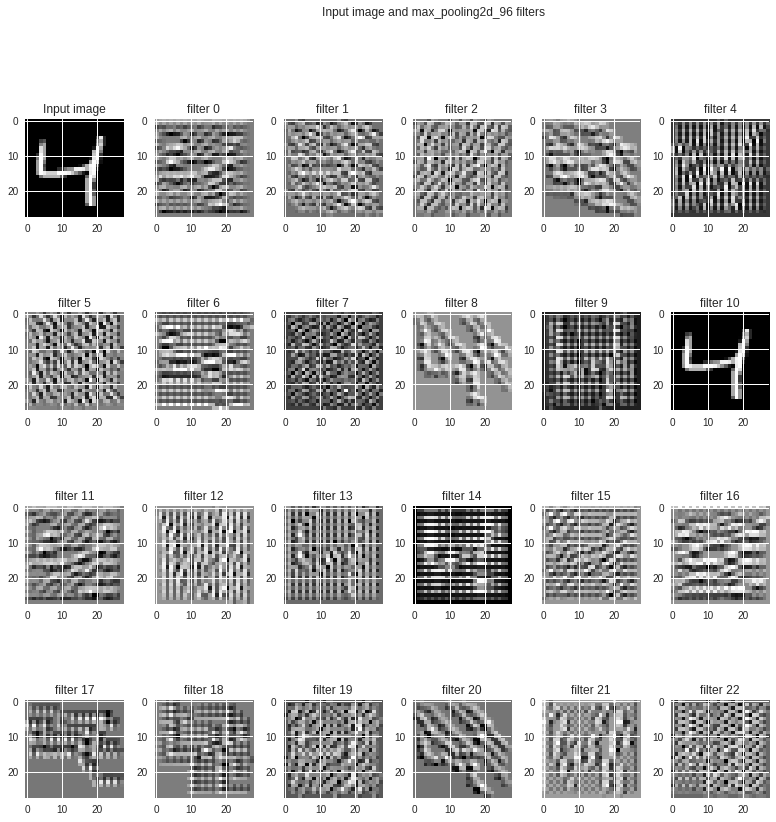

In [322]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'max_pooling2d_96'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()